In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import dask.dataframe as dd
import numpy as np
import pandas as pd
import pickle


traindata = pd.read_csv('../data/train.csv')
traindata = traindata.set_index('Id')
groups = traindata.groupby(traindata.index)

def marshall_palmer(ref, minutes_past):
    #minutes_past = df['minutes_past']
    minutes_in_segment = 60.0
    valid_time = minutes_past.diff()
    valid_time.iloc[0] = minutes_past.iloc[0]
    valid_time.iloc[-1] = valid_time.iloc[-1] + minutes_in_segment - np.sum(valid_time)
    valid_time = valid_time/60.0
    ref = group1['Ref']
    minutes_past = group1['minutes_past']
    minutes_in_segment = 60.0
    valid_time = minutes_past.diff()
    valid_time.iloc[0] = minutes_past.iloc[0]
    valid_time.iloc[-1] = valid_time.iloc[-1] + minutes_in_segment - np.sum(valid_time)
    valid_time = valid_time/60.0
    valid_time = valid_time[np.isfinite(ref)]
    ref = ref[np.isfinite(ref)]
    mmperhr = np.dot(pow(pow(10, ref/10)/200, 0.625), valid_time)
    return mmperhr

def operate_on_each_hour(hour):
    hour = hour.sort('minutes_past', ascending=True)
    gauge_estimate = marshall_palmer(hour['Ref'], hour['minutes_past'])

In [55]:
traindata.head()

,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,,,,,,,,,,,,,,,,,,,,,
1,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,16,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,25,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,35,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,45,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254


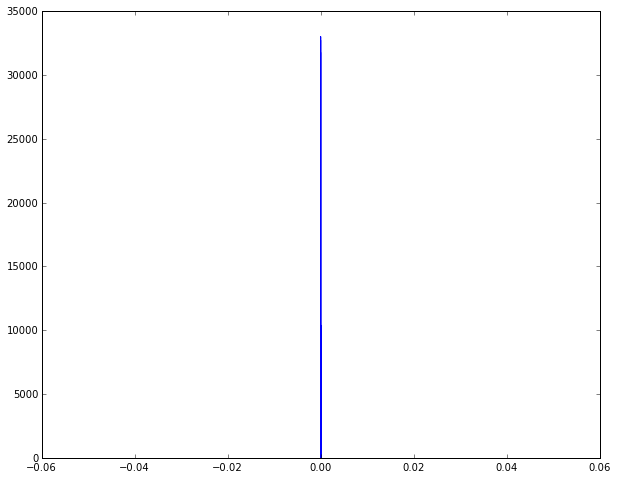

In [56]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
gauge_expected = [];
gauge_observed = [];

for groupname, group in groups:
    expected = marshall_palmer(group['Ref'], group['minutes_past'])
    observed = group['Expected'].mean()
    gauge_observed.append(observed)
    gauge_expected.append(expected)

plt.plot(gauge_expected, gauge_observed)
    

In [ ]:
traindata.astype(object).to_pickle('traindata.pickle')